In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

## Phase 1 — Recherche et acquisition de données

In [158]:
# Charger les datasets.
weather = pd.read_csv("dataset/us_weather.csv")
disasters = pd.read_excel("dataset/gobal_disasters.xlsx")


In [200]:
weather

,Unnamed: 0,month,year,state,average_temp,monthly_mean_from_1901_to_2000,centroid_lon,centroid_lat
0,0,1,1950,Alabama,53.8,45.9,-86.828372,32.789832
1,1,1,1950,Arizona,39.6,41.1,-111.664418,34.293110
2,2,1,1950,Arkansas,45.6,40.4,-92.439268,34.899745
3,3,1,1950,California,39.4,42.7,-119.610699,37.246071
4,4,1,1950,Colorado,25.2,24.5,-105.547825,38.998552
...,...,...,...,...,...,...,...,...
41851,41851,8,2022,Virginia,75.9,74.0,-78.812254,37.515024
41852,41852,8,2022,Washington,68.9,63.8,-120.446866,47.380969
41853,41853,8,2022,West Virginia,72.4,71.1,-80.613712,38.642599
41854,41854,8,2022,Wisconsin,68.3,67.7,-90.011694,44.638030


In [159]:
# Informations sur le df des désastres
disasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16194 entries, 0 to 16193
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     16194 non-null  object 
 1   Historic                                   16194 non-null  object 
 2   Classification Key                         16194 non-null  object 
 3   Disaster Group                             16194 non-null  object 
 4   Disaster Subgroup                          16194 non-null  object 
 5   Disaster Type                              16194 non-null  object 
 6   Disaster Subtype                           16194 non-null  object 
 7   External IDs                               2707 non-null   object 
 8   Event Name                                 5101 non-null   object 
 9   ISO                                        16194 non-null  object 
 10  Country               

In [160]:
# Informations sur le df des témperatures
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41856 entries, 0 to 41855
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      41856 non-null  int64  
 1   month                           41856 non-null  int64  
 2   year                            41856 non-null  int64  
 3   state                           41856 non-null  object 
 4   average_temp                    41856 non-null  float64
 5   monthly_mean_from_1901_to_2000  41856 non-null  float64
 6   centroid_lon                    41856 non-null  float64
 7   centroid_lat                    41856 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 2.6+ MB


In [161]:
# Filtrer le df des désastre et ne conserver que les données sur les USA
usa_disasters = disasters[disasters['ISO'] == 'USA'].copy()
usa_disasters.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
22,2000-0021-USA,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,USA,...,NaN,NaN,200500.0,354778.0,210000.0,371587.0,56.514291,"[{""adm2_code"":29698,""adm2_name"":""Crittenden""},...",2003-07-01,2023-09-25
35,2000-0035-USA,No,tec-tra-air-air,Technological,Transport,Air,Air,NaN,MD-83,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2003-07-01,2023-09-25
63,2000-0067-USA,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":28696,""adm2_name"":""Bullock""},{""a...",2005-04-24,2023-09-25
74,2000-0080-USA,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":3231,""adm1_name"":""Kentucky""},{""a...",2005-09-16,2023-09-25
116,2000-0128-USA,No,nat-cli-wil-for,Natural,Climatological,Wildfire,Forest fire,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":28998,""adm2_name"":""Alachua""},{""a...",2003-07-01,2023-09-25


In [162]:
#Shape du df des désastres
usa_disasters.shape

(722, 46)

In [163]:
# Regroupe par années et calculer les temperatures moyennes
weather_agg = weather.groupby(['year']).agg({
    'average_temp': 'mean',
    'monthly_mean_from_1901_to_2000': 'mean'
}).reset_index()
weather_agg.head()

,year,average_temp,monthly_mean_from_1901_to_2000
0,1950,50.857118,51.405382
1,1951,50.825347,51.407118
2,1952,51.893403,51.404167
3,1953,52.992535,51.404861
4,1954,52.607292,51.405903


In [164]:
# Vérifier les valeurs manquantes dans le nouveau df
weather_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            73 non-null     int64  
 1   average_temp                    73 non-null     float64
 2   monthly_mean_from_1901_to_2000  73 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.8 KB


In [165]:
# S'assurer que la colonne des années est présente et a le bon type
usa_disasters['year'] = pd.to_datetime(usa_disasters['Entry Date']).dt.year
weather_agg['year'] = weather_agg['year'].astype(int)

# Fusionner les deux datasets par l'année
merged_data = pd.merge(
    usa_disasters,
    weather_agg,
    on='year',
    how='left'
)

In [166]:
# Shape du df
merged_data.shape

(722, 49)

## Phase 2 — Prétraitement & Analyse exploratoire


In [167]:
# Vérifier les valeurs manquantes
print(merged_data.isnull().sum())

DisNo.                                         0
Historic                                       0
Classification Key                             0
Disaster Group                                 0
Disaster Subgroup                              0
Disaster Type                                  0
Disaster Subtype                               0
External IDs                                 675
Event Name                                   552
ISO                                            0
Country                                        0
Subregion                                      0
Region                                         0
Location                                       1
Origin                                       580
Associated Types                             418
OFDA/BHA Response                              0
Appeal                                         0
Declaration                                    0
AID Contribution ('000 US$)                  722
Magnitude           

In [168]:
# Supprimer tous les champs qui ont plus de 40% de valeurs manquantes (+300)
threshold = 300 
cols_to_drop = [col for col in merged_data.columns if merged_data[col].isnull().sum() > threshold]
df_cleaned = merged_data.drop(columns=cols_to_drop)

In [169]:
# Vérifier les valeurs manquantes
print(df_cleaned.isnull().sum())

DisNo.                                 0
Historic                               0
Classification Key                     0
Disaster Group                         0
Disaster Subgroup                      0
Disaster Type                          0
Disaster Subtype                       0
ISO                                    0
Country                                0
Subregion                              0
Region                                 0
Location                               1
OFDA/BHA Response                      0
Appeal                                 0
Declaration                            0
Magnitude Scale                       90
Start Year                             0
Start Month                            0
Start Day                             34
End Year                               0
End Month                              3
End Day                               32
Total Deaths                         162
Total Affected                       269
Total Damage ('0

In [170]:
# Supprimer les lignes dont les données ne correspondent pas
df_cleaned = df_cleaned.dropna(subset=["average_temp"])

In [171]:
# Remplir les locations inconnues
df_cleaned['Location'].fillna('Unknown', inplace=True)

C:\Users\chris.DESKTOP-GCU74DF\AppData\Local\Temp\ipykernel_28528\3714227734.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Location'].fillna('Unknown', inplace=True)


In [172]:
# Replace les jours manquants par la médiane:
df_cleaned['Start Day'].fillna(df_cleaned['Start Day'].median(), inplace=True)

C:\Users\chris.DESKTOP-GCU74DF\AppData\Local\Temp\ipykernel_28528\2797185001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Start Day'].fillna(df_cleaned['Start Day'].median(), inplace=True)


In [180]:
#1. Calcul d'Anomalies de Température

# Anomalie = Température observée - Référence historique
df_cleaned['temp_anomaly'] = df_cleaned['average_temp'] - df_cleaned['monthly_mean_from_1901_to_2000']

# Anomalie annuelle moyenne (par année)
annual_anomaly = df_cleaned.groupby('year')['temp_anomaly'].mean().reset_index()
annual_anomaly

,year,temp_anomaly
0,2003,0.768576
1,2004,1.023958
2,2005,1.677604
3,2006,2.110243
4,2007,1.835590
5,2008,0.465278
6,2009,0.410069
7,2010,1.353993
8,2011,1.267708
9,2012,3.418056


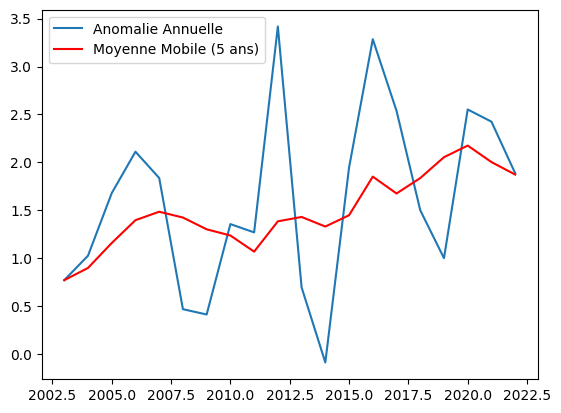

In [174]:
#2. Moyennes Mobiles (Lissage des Tendances)
# Moyenne mobile sur 5 ans pour l'anomalie
annual_anomaly['rolling_5yr'] = annual_anomaly['temp_anomaly'].rolling(window=5, min_periods=1).mean()

# Visualisation
import matplotlib.pyplot as plt
plt.plot(annual_anomaly['year'], annual_anomaly['temp_anomaly'], label='Anomalie Annuelle')
plt.plot(annual_anomaly['year'], annual_anomaly['rolling_5yr'], label='Moyenne Mobile (5 ans)', color='red')
plt.legend()
plt.show()


In [175]:
#3. Tendance Linéaire (Réchauffement Climatique)


# Régression linéaire entre l'année et l'anomalie
slope, intercept, _, _, _ = linregress(annual_anomaly['year'], annual_anomaly['temp_anomaly'])
print(f"Tendance de réchauffement: {slope:.3f}°C par an")

# Prédiction pour 2050
warming_2050 = intercept + slope * 2050
print(f"Anomalie prédite en 2050: {warming_2050:.2f}°C")

Tendance de réchauffement: 0.056°C par an
Anomalie prédite en 2050: 3.71°C


In [176]:
#4. Indicateurs Climatiques Dérivés
# Écart-type des anomalies par année (variabilité)
df_cleaned['annual_variability'] = df_cleaned.groupby('year')['temp_anomaly'].transform('std')

# Fréquence des anomalies extrêmes (>2σ)
df_cleaned['extreme_anomaly'] = (df_cleaned['temp_anomaly'] > 2 * df_cleaned['temp_anomaly'].std()).astype(int)

In [177]:
# Conserver le df dans une nouvelle variable
df =df_cleaned.copy()

In [178]:
#Indice de Risque Climatique
# Combinaison anomalie + dommages (normalisés)
df['damage_normalized'] = (df["Total Damage ('000 US$)"] - df["Total Damage ('000 US$)"].min()) / (df["Total Damage ('000 US$)"].max() - df["Total Damage ('000 US$)"].min())
df['climate_risk'] = 0.5 * df['temp_anomaly'] + 0.5 * df['damage_normalized']

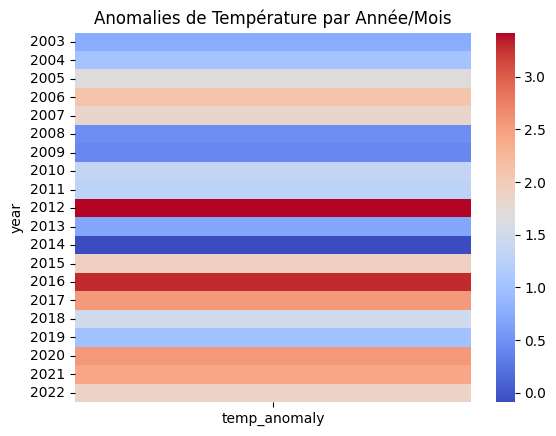

In [ ]:
#Heatmap Temporelle
import seaborn as sns

# Pivot table pour les anomalies par année/mois
heatmap_data = df.pivot_table(values='temp_anomaly', index='year', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Anomalies de Température par Année/Mois')
plt.show()

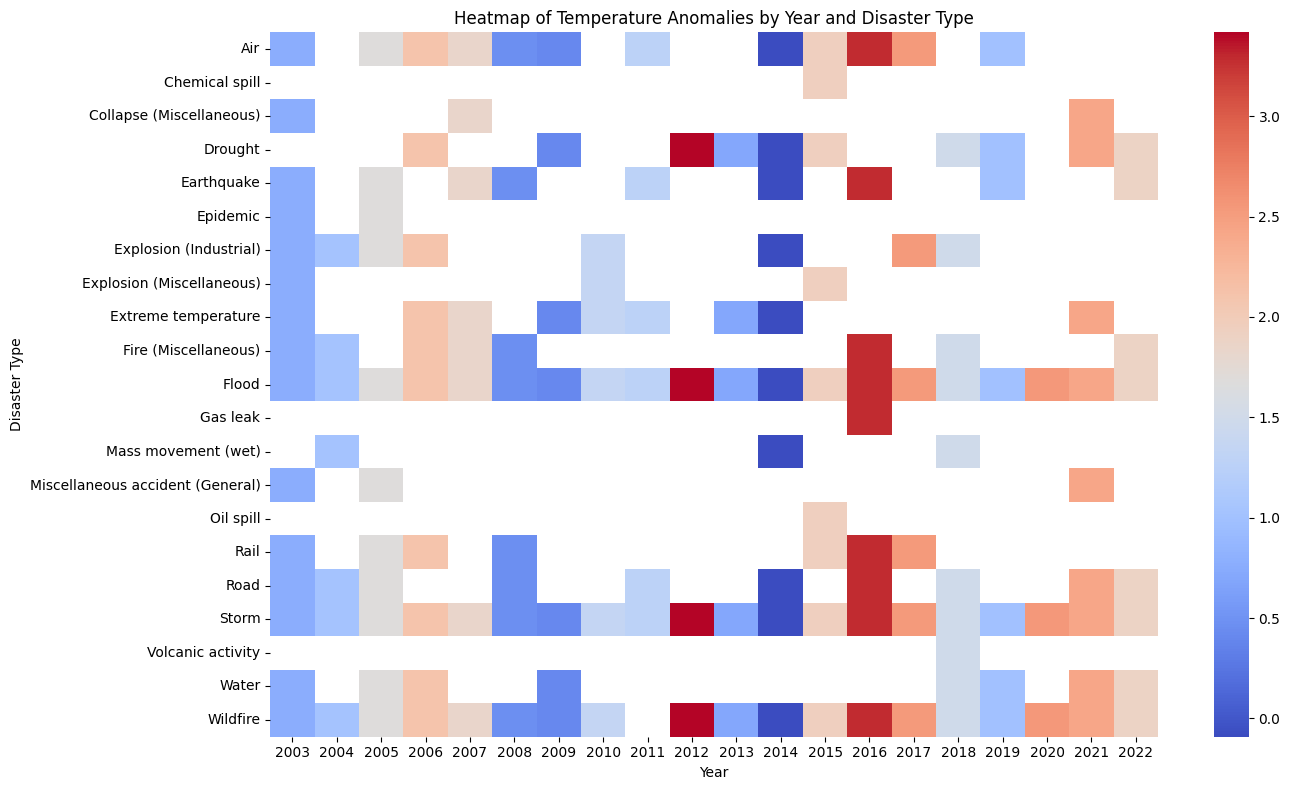

In [183]:
pivot = df.pivot_table(
    index='Disaster Type', 
    columns='year', 
    values='temp_anomaly', 
    aggfunc='mean'
)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap='coolwarm', annot=False)
plt.title('Heatmap of Temperature Anomalies by Year and Disaster Type')
plt.xlabel('Year')
plt.ylabel('Disaster Type')
plt.tight_layout()
plt.show()



## Phase 4 — Analyse avancée et interprétation

In [196]:
# Filtrer la période de référence
reference_period = df[(df['year'] >= 2012) & (df['year'] <= 2022)]
reference_mean = reference_period['average_temp'].mean()

# Calculer l'anomalie pour chaque observation
df['temp_anomaly_2003_2022'] = df['average_temp'] - reference_mean

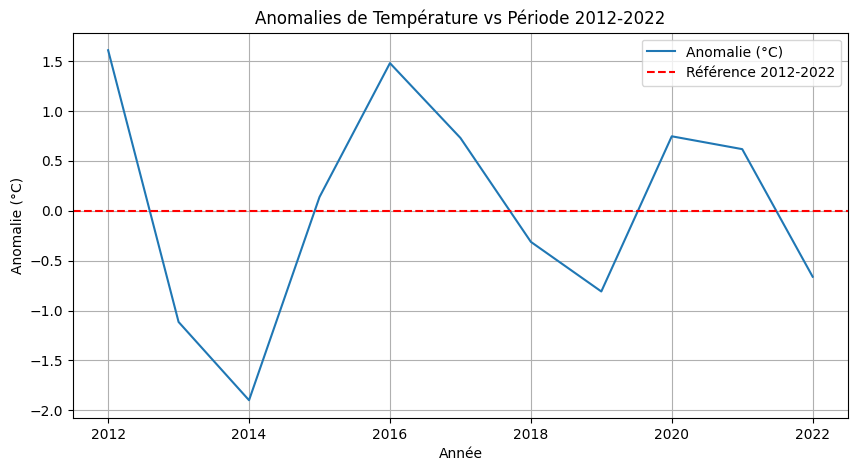

In [199]:

# Anomalies annuelles moyennes
annual_anomaly = reference_period.groupby('year')['temp_anomaly_2012_2022'].mean()

plt.figure(figsize=(10, 5))
plt.plot(annual_anomaly.index, annual_anomaly.values, label='Anomalie (°C)')
plt.axhline(0, color='red', linestyle='--', label='Référence 2012-2022')
plt.title('Anomalies de Température vs Période 2012-2022')
plt.xlabel('Année')
plt.ylabel('Anomalie (°C)')
plt.legend()
plt.grid()
plt.show()

Interprétation
*   Une anomalie positive → Réchauffement par rapport à la référence.

*   Une anomalie négative → Refroidissement.

2. Corrélations Climat-Catastrophes
Objectif : Identifier des relations statistiques entre variables climatiques et catastrophes.

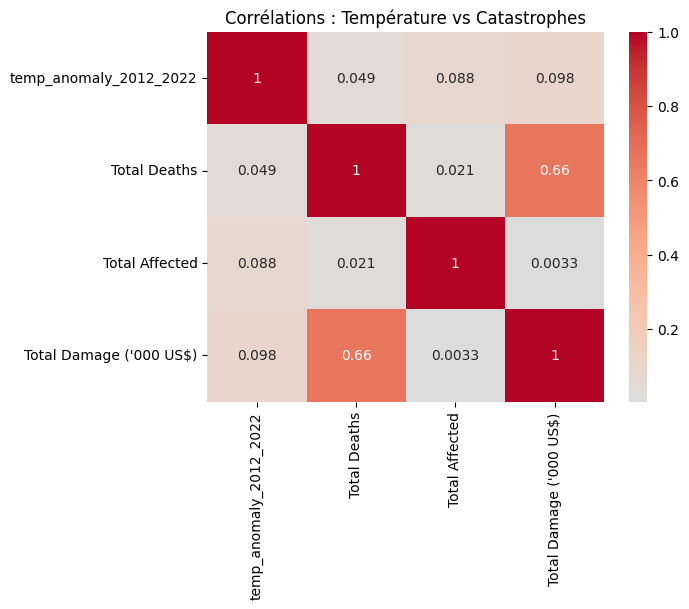

In [ ]:
# Sélection des variables numériques
corr_vars = ["temp_anomaly_2012_2022", "Total Deaths", "Total Affected", "Total Damage ('000 US$)"]
corr_matrix = df[corr_vars].corr()

# Heatmap
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Corrélations : Température vs Catastrophes')
plt.show()

In [ ]:

# Modèle : Dommages = f(Anomalie, CPI, Autres facteurs)
X = df[['temp_anomaly_2012_2022', 'CPI']]
X = sm.add_constant(X)  # Ajoute une constante (intercept)
y = df["Total Damage ('000 US$)"]

model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Total Damage ('000 US$)   R-squared:                       0.013
Model:                                 OLS   Adj. R-squared:                  0.008
Method:                      Least Squares   F-statistic:                     2.728
Date:                     Tue, 08 Apr 2025   Prob (F-statistic):             0.0665
Time:                             17:22:42   Log-Likelihood:                -7614.3
No. Observations:                      433   AIC:                         1.523e+04
Df Residuals:                          430   BIC:                         1.525e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [ ]:
# Préparer les séries temporelles (annuelles)
granger_data = df.groupby('year')[["temp_anomaly_2012_2022", "Total Damage ('000 US$)"]].mean()

# Test de Granger (lag=2 ans)
granger_test = grangercausalitytests(granger_data, maxlag=2, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2956  , p=0.0883  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=3.9135  , p=0.0479  , df=1
likelihood ratio test: chi2=3.5585  , p=0.0592  , df=1
parameter F test:         F=3.2956  , p=0.0883  , df_denom=16, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8416  , p=0.1976  , df_denom=13, df_num=2
ssr based chi2 test:   chi2=5.0999  , p=0.0781  , df=2
likelihood ratio test: chi2=4.4903  , p=0.1059  , df=2
parameter F test:         F=1.8416  , p=0.1976  , df_denom=13, df_num=2


d:\IR5\OpenData\TP1\.venv\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
